In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
from os import listdir
import io


In [4]:
aal = pd.read_csv('/Users/anna/Desktop/MainDirectory/gitrepositories/DataP_EXAM/data/AAL.csv')
googl = pd.read_csv('/Users/anna/Desktop/MainDirectory/gitrepositories/DataP_EXAM/data/GOOGL.csv')
hca = pd.read_csv('/Users/anna/Desktop/MainDirectory/gitrepositories/DataP_EXAM/data/HCA.csv')
luv = pd.read_csv('/Users/anna/Desktop/MainDirectory/gitrepositories/DataP_EXAM/data/LUV.csv')
mmm = pd.read_csv('/Users/anna/Desktop/MainDirectory/gitrepositories/DataP_EXAM/data/MMM.csv')

In [14]:
all_firms = pd.DataFrame()
files = [file for file in listdir('.') if file.endswith('.csv')]

for file in files:
    df = pd.read_csv(file)
    firm_name = file
    df['firm_name'] = firm_name.strip('.csv')
    all_firms = pd.concat([all_firms, df])

#ls_firms = ['all', 'googl', 'hca', 'luv', 'mmm']

all_firms.sample(200)

#This should create a single file with a new column that corresponds to the


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,firm_name
1155,2021-08-05,142.886,143.296,141.979,142.346,1883939,0.0,0.0,MMM
749,2019-12-24,67.344,67.434,67.042,67.055,13468000,0.0,0.0,GOOGL
857,2020-06-01,103.076,106.549,102.797,104.996,1339100,0.0,0.0,HCA
1439,2022-09-21,87.999,88.903,86.470,86.477,4468017,0.0,0.0,MMM
1025,2021-01-29,91.474,92.149,89.856,91.142,44530000,0.0,0.0,GOOGL
...,...,...,...,...,...,...,...,...,...
202,2017-10-20,75.222,76.151,75.034,76.066,3793200,0.0,0.0,HCA
17,2017-01-27,49.839,49.931,48.272,48.567,7687000,0.0,0.0,LUV
990,2020-12-08,90.203,90.574,89.343,90.343,19936000,0.0,0.0,GOOGL
828,2020-04-20,11.150,11.350,10.720,11.060,58984900,0.0,0.0,AAL


In [6]:
files

['HCA.csv', 'MMM.csv', 'GOOGL.csv', 'AAL.csv', 'LUV.csv']

In [12]:
all_firms.sample(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,firm_name
410,2018-08-20,124.341,125.106,123.840,124.218,1112700,0.0,0.0,HCA
411,2018-08-21,124.199,124.927,123.112,123.415,2208900,0.0,0.0,HCA
729,2019-11-25,28.694,29.073,28.515,28.883,5171200,0.0,0.0,AAL
1122,2021-06-18,197.099,198.343,194.719,195.632,2576000,0.0,0.0,HCA
690,2019-10-01,26.893,27.469,26.407,26.615,6547000,0.0,0.0,AAL


# Part 1


In [37]:
#Question 1 - Is there a company that has no difference between the High and Low columns? What does it mean for the stock's trading behavior on such days?

all_firms['Difference'] = all_firms['High'] == all_firms['Low']
all_firms.head()

ls_firms = []

firms_differ = all_firms.loc[all_firms['Difference'] == True, 'firm_name'].tolist()

In [38]:
unqiue_differ = list(set(firms_differ))
for firm in unqiue_differ:
    print(f'{firm} do not have difference between high and low')

print(unqiue_differ)

# There are not firms that do not have difference between high and low

[]


In [ ]:
#Questions 2 - (1pt task) "What is the highest and lowest price (High) each company recorded?"


In [44]:
ls_firms = ['AAL', 'GOOGL', 'HCA', 'LUV', 'MMM']

In [46]:
for firm in ls_firms:
    max_p = all_firms[all_firms['firm_name'] == firm]['High'].max()
    min_p = all_firms[all_firms['firm_name'] == firm]['High'].min()
    print(f'{firm} has the highest price recorded of {max_p} and the lowest price recorded of {min_p}')

AAL has the highest price recorded of 57.583 and the lowest price recorded of 9.19
GOOGL has the highest price recorded of 151.172 and the lowest price recorded of 40.472
HCA has the highest price recorded of 272.703 and the lowest price recorded of 70.126
LUV has the highest price recorded of 62.244 and the lowest price recorded of 23.711
MMM has the highest price recorded of 167.233 and the lowest price recorded of 82.191


In [51]:
#Questions 3 - (1pt task) Calculate logarithmic returns from Close. For each company report on its, min, max, mean, standard deviation, and skewness of the return distribution

all_firms['log_return_close'] = all_firms.groupby('firm_name')['Close'].transform(lambda x: np.log(x/x.shift(1)))
all_firms.head(10)

for firm in ls_firms:
    max_p = all_firms[all_firms['firm_name'] == firm]['log_return_close'].max()
    min_p = all_firms[all_firms['firm_name'] == firm]['log_return_close'].min()
    mean = all_firms[all_firms['firm_name'] == firm]['log_return_close'].mean()
    sd =all_firms[all_firms['firm_name'] == firm]['log_return_close'].std()
    print(f'{firm} has maximum log returns of Close of {max_p}, minumum log returns of Close of {min_p}, mean {mean} and standard deviation {sd}')

AAL has maximum log returns of Close of 0.3442777400754154, minumum log returns of Close of -0.2906818604308926, mean -0.000833475645635291 and standard deviation 0.03573578345942718
GOOGL has maximum log returns of Close of 0.09184315840889078, minumum log returns of Close of -0.12370129670888536, mean 0.0005176255044912753 and standard deviation 0.01849935654025616
HCA has maximum log returns of Close of 0.20342197961016176, minumum log returns of Close of -0.24619621388447457, mean 0.0008077444470560625 and standard deviation 0.02306804672538492
LUV has maximum log returns of Close of 0.13490833414814063, minumum log returns of Close of -0.1637886825883708, mean -0.0002376756388929385 and standard deviation 0.023453403852766147
MMM has maximum log returns of Close of 0.11865788808084467, minumum log returns of Close of -0.13862834176275443, mean -0.00013477461232596426 and standard deviation 0.016042875990854775


In [64]:
#Question 4 -When did each company record the second highest gain and second highest loss for the day? (logarithmic loss). Hint: idxmax
for firm in ls_firms:
    gain = all_firms[all_firms['firm_name'] == firm]['log_return_close'].idxmax()
    loss = all_firms[all_firms['firm_name'] == firm]['log_return_close'].idxmin()
    gain_date = all_firms.loc[gain+1, 'Date']
    loss_date = all_firms.loc[loss+1, 'Date']
    print(f'{firm} had  second highest gain on {gain_date} and second highest loss on {loss_date}')


AAL had highest gain on 861    2020-06-05
861    2020-06-05
861    2020-06-05
861    2020-06-05
861    2020-06-05
Name: Date, dtype: object and loss on 807    2020-03-19
807    2020-03-19
807    2020-03-19
807    2020-03-19
807    2020-03-19
Name: Date, dtype: object
GOOGL had highest gain on 645    2019-07-29
645    2019-07-29
645    2019-07-29
645    2019-07-29
645    2019-07-29
Name: Date, dtype: object and loss on 805    2020-03-17
805    2020-03-17
805    2020-03-17
805    2020-03-17
805    2020-03-17
Name: Date, dtype: object
HCA had highest gain on 808    2020-03-20
808    2020-03-20
808    2020-03-20
808    2020-03-20
808    2020-03-20
Name: Date, dtype: object and loss on 1336    2022-04-25
1336    2022-04-25
1336    2022-04-25
1336    2022-04-25
1336    2022-04-25
Name: Date, dtype: object
LUV had highest gain on 804    2020-03-16
804    2020-03-16
804    2020-03-16
804    2020-03-16
804    2020-03-16
Name: Date, dtype: object and loss on 803    2020-03-13
803    2020-03-13
8

In [ ]:
#Question 5 - What is the median calendar weekly volume for each company? Hint: check howto resample pandas DF

In [71]:
#Question 6 -Which company recorded the lowest total return over the whole period?
for firm in ls_firms:
    firm_data = all_firms[all_firms['firm_name'] == firm].sort_values('Date')
    first_price = firm_data['Close'].iloc[0]
    last_price = firm_data['Close'].iloc[-1]
    total_return = (last_price / first_price) - 1
    all_firms['total_return'] = total_return

...

In [95]:
#Question 7 - Create a new column volume_class based on the volume column intocategories (e.g., "Low", "Medium", "High") and use tertile thresholds for the classes.
#all_firms['volume_categories']= df.groupby('group').apply(lambda x : \
         # x[x.var2>=x.var2.tertile(0.66)]


KeyError: 'group'

In [ ]:
#all_firms['volume_categories']

Text(0.5, 0, 'Date')

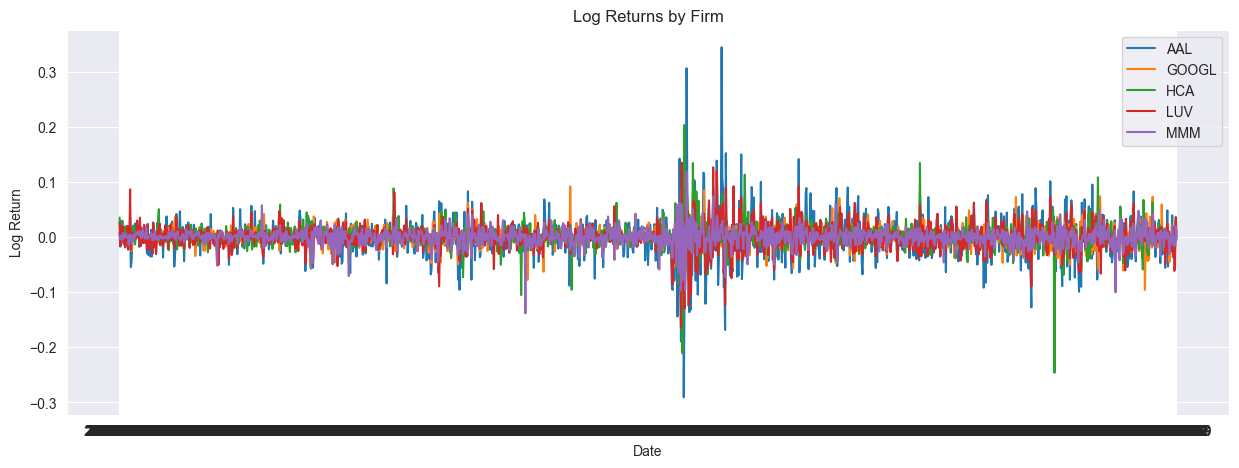

In [53]:
#Question 8

plt.subplots(1,1, figsize = (15,5))
for firm in ls_firms:
    firm_data = all_firms[all_firms['firm_name'] == firm]
    plt.plot(firm_data["Date"], firm_data["log_return_close"], label=firm)
plt.legend()
plt.title('Log Returns by Firm')
plt.ylabel('Log Return')
plt.xlabel('Date')



# Part 2

In [98]:
#

url = "https://ies-fsv.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv"
data = pd.read_csv(url)

In [99]:
#Question 1
data['included'].isna().count()



np.int64(503)

In [100]:
data.head(5)

,Symbol,Security,GICS_Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981


In [101]:
#Question 2

data.dropna(subset=['included'], inplace=True)

data.sort_values(by=['Founded'], ascending=True,inplace=True)
print(data.head(1))
data.sort_values(by=['Founded'], ascending=False,inplace=True)
print(data.head(1))

#Probably not the smartest way to do this :)

   Symbol    Security GICS_Sector                       hq    included Founded
71     BK  BNY Mellon  Financials  New York City, New York  31.03.1995    1784
    Symbol                Security             GICS_Sector  \
481    WBD  Warner Bros. Discovery  Communication Services   

                          hq    included Founded  
481  New York City, New York  11.04.2022    2022  


In [102]:
#Question 5

data2 = pd.read_csv('https://ies-fsv.s3.eu-central-1.amazonaws.com/companies/companies_subindustry.csv')

data2.head()

merged = pd.merge(data, data2, on='Symbol')

merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Symbol       458 non-null    object
 1   Security     458 non-null    object
 2   GICS_Sector  458 non-null    object
 3   hq           458 non-null    object
 4   included     458 non-null    object
 5   Founded      458 non-null    object
 6   subindustry  458 non-null    object
dtypes: object(7)
memory usage: 25.2+ KB


# Part 3



In [ ]:
#) Generate four random variables from four different distributions(e.g. Normal, Uniform, etc.) each containing random number of observationsbetween 100 and 500


In [ ]:
#Draw a figure with a matrix of plots where you show somethingabout the random variables (e.g. pdf, cdf, histogram, boxplot, etc.).